# 从零开始AI - 认知服务 - 计算机视觉

> ··· 您可以访问 [https://github.com/HaoHoo/F02AI](https://github.com/HaoHoo/F02AI) 来获得 “从零开始AI” 系列全部的内容。··· <br>
>`请以原样使用或转发，欢迎Issue，敬请PR；如果觉得有些意思，欢迎Fork，敬谢Star。` 

说起从零开始AI，使用Azure的认知服务算是一个再方便不过的方式了。认知服务使用标准REST 
API提供服务接口，这意味着开发者即使还没开始学习有关的人工智能代码，也可以在自己的应用中马上引入人工智能的能力。

认知服务分为几大类，其中计算机视觉是非常重要的一个类别。实际上计算机对图片的识别速度和准确度已经超过了人类，所以我们看看计算机能用这个能力做些什么，也是一件非常有趣的事。

按照现有提供的计算机视觉的分类，接下来我们可以尝试如下几种能力：
* [图像分析](#AnalyzeImage)
* [使用特定领域模型](#DomainSpecificModel)
* [识别图中成人内容](#Adult)
* [智能生成缩略图](#GetThumbnail)
* [识别图中的印刷文字](#OCR)
* [识别图中的手写文字](#RecognizeText)
* [分析保存在本地的图片](#AnalyzeImageOnDisk)

和其他认知服务一样，计算机视觉也是运行在Azure的服务。为了使用Computer Vision API，您需要一个订阅密钥 (subscription key)。别担心，您可以在[这里](https://docs.microsoft.com/azure/cognitive-services/Computer-vision/Vision-API-How-to-Topics/HowToSubscribe?WT.mc_id=AI-MVP-33253)获取免费的订阅密钥。或者在[这里](https://azure.microsoft.com/zh-cn/try/cognitive-services)获取试用的订阅密钥。

获取订阅密钥后，请记录密钥及分配的Azure服务区域。对于测试认知服务，往往会分配美国中西区域 (WestCentralUS)。后面我们使用这些API时，必须提供这两种信息。

为了运行后续代码，我们需要提供已经获得的服务订阅密钥和服务区域信息。首先输入服务订阅密钥。

In [1]:
subscription_key = input("Please input your Service Key:")
assert subscription_key

Please input your Service Key:90f97b9713eb4380bd322395edc5d2a1


然后，请再次按照提示输入API密钥对应的服务区域(`westus`, `westcentralus`, 等等)。输入服务区域后，组合的对应 `vision_base_url` 显示的地址将作为服务API调用的终结点地址。如果使用的是免费的订阅，目前通常为 `westus`。

In [2]:
service_region = input("Please input your Service Region:")

Please input your Service Region:westus


## 使用Python调用Computer Vision API进行图像分析 <a name="AnalyzeImage"> </a>

在 [Analyze Image 方法](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa) API网站，您能够直接在页面查看图像分析所支持的方法。该 API 网站非常便利，除了查阅 API 方法之外，您还可以直接尝试提供图片测试该 API。如果调用成功，API 将返回以下信息:
* 与图像内容相关的标签的详细列表。
* 对图像内容的一个完整句子的描述。
* 图像中包含的任何脸部的坐标、性别和年龄。
* 图像类型（剪贴画或线条图）。
* 主色、强调色或图像是否为黑白。
* 在[分类](https://docs.microsoft.com/azure/cognitive-services/computer-vision/category-taxonomy)中定义的类别。
* 图像是否包含成人或性暗示内容？

### 分析图像
后续大部分的示例代码是基于计算机视觉 API 2.0 版本的，所以我们可以先构造一个基本的 URL， 不同功能的 URL 只需基于这个 URL 进行功能路径添加即可。

In [ ]:
vision_base_url = "https://"+service_region+".api.cognitive.microsoft.com/vision/v2.0/"

图像分析的URL调用链接形如以下的例子 (可以在[这里](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa)查看REST API文档):

<code>https://[location].api.cognitive.microsoft.com/vision/v2.0/<b>analyze</b>[?visualFeatures][&details][&language]</code>

因为我们首先尝试图像分析，所以URL后面调用的功能为 `analyze`。

In [ ]:
vision_analyze_url = vision_base_url + "analyze"

要开始分析图像，我们需要提供一张图片的URL给 `image_url` 变量。

In [ ]:
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
image_url = "https://github.com/HaoHoo/F02AI/raw/master/N02/images/Vision/ljz.jpeg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

为了通过 REST 方式调用计算机视觉 `analyze` API，接下来的代码块需要使用 Python 的 `requests` 库。API 调用的结果将以 JSON 对象返回。按照规范，变量 `headers` 使用一个 dictionary 类型来包含必要的 API 密钥信息。而变量 `params` 同样使用 dictionary 类型来定义要调用的可视化功能，在这里我们选择三个功能  Categories,Description,Color 来尝试。所有支持的功能都可以访问 [REST API 文档](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa)查看。

接着就可以通过 `requests` 来调用 REST 并返回 JSON 形式的结果了。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Color'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

`analysis` 对象包含了很多个变量域来描述分析的图像。图像最相关的标题可以从 `descriptions` 属性中获得。我们可以把描述从 JSON 中挑选出来。

In [ ]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

下面的代码行显示您提供的图像，并用推断出的标题标记在图像上。

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=0, color='white')

## 使用特定领域模型 <a name="DomainSpecificModel"> </a>

[特定领域模型](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fd) 是一个训练用来识别图像中特定对象集的模型。当前可用的两个特定于域的模型是_名人_(_celebrities_)和_地标_(_landmarks_). 

要查看受支持的特定于域的模型的列表，可以针对该服务发出以下请求。

In [ ]:
model_url = vision_base_url + "models"
headers   = {'Ocp-Apim-Subscription-Key': subscription_key}
models    = requests.get(model_url, headers=headers).json()
[model["name"] for model in models["models"]]

### 地标识别
要开始使用特定领域的地标模型，请将 `image_url` 设置为指向要分析的图像。

In [ ]:
image_url = "https://github.com/HaoHoo/F02AI/raw/master/N02/images/Vision/tam.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

如下构造图像分析服务的终结点调用结构：

In [ ]:
landmark_analyze_url = vision_base_url + "models/landmarks/analyze"
print(landmark_analyze_url)

现在 `image_url` 所指定的图片能够被分析为地标。识别出的地标描述将保存在 `landmark_name` 中：

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'landmarks'}
data     = {'url': image_url}
response = requests.post(landmark_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis      = response.json()
assert analysis["result"]["landmarks"] is not []

landmark_name = analysis["result"]["landmarks"][0]["name"].capitalize()

让我们把地标信息写进图片。

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(landmark_name, size="x-large", y=-0.02)

### 名人识别
同样，可以调用特定于领域的名人识别模型，如下所示。第一组 `image_url` 指向名人的图片。

In [ ]:
image_url = "https://raw.githubusercontent.com/HaoHoo/F02AI/master/N02/images/Vision/BillG.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

识别名人的服务终结点的调用构造如下：

In [ ]:
celebrity_analyze_url = vision_base_url + "models/celebrities/analyze"
print(celebrity_analyze_url)

然后， `image_url` 指定的图片中的名人将被识别出来。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'model': 'celebrities'}
data     = {'url': image_url}
response = requests.post(celebrity_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()
print(analysis)

分析结果如上返回名人的信息，例如面部位置、名字、可行度等等。如果图片中识别出了名人，接下来的代码将从结果中获取名人相关的信息：

In [ ]:
assert analysis["result"]["celebrities"] is not []
celebrity_info = analysis["result"]["celebrities"][0]
celebrity_name = celebrity_info["name"]
celebrity_face = celebrity_info["faceRectangle"]

接下来，我们可以使用返回的信息，在图片上标记名人的脸并加上注释：

In [ ]:
from matplotlib.patches import Rectangle
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.6)
origin = (celebrity_face["left"], celebrity_face["top"])
p      = Rectangle(origin, celebrity_face["width"], celebrity_face["height"], 
                   fill=False, linewidth=2, color='b')
ax.axes.add_patch(p)
plt.text(origin[0], origin[1], celebrity_name, fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

## 检查图片成人内容 🔞 <a name="Adult"> </a>

现在通过网络获得图片无比便捷。为了不让未成年人看到成人内容的图片，人工智能可以帮助我们分析图片，对图片中的成人内容进行识别和标记。
成人内容检测并不是独立的认知服务 API 方法，不过这个话题比较有趣，所以我们也可以尝试一下。

我们先切换回 `analyze` 方法。

In [ ]:
image_url = "https://github.com/HaoHoo/F02AI/raw/master/N02/images/Vision/cjk.png"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

图像分析方法中指定功能就能返回是否有成人内容的结果。我们把 `adult` 功能加到参数中。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Categories,Description,Adult,Faces'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

接下来我们输出图像分析的结果看看。

In [ ]:
print(analysis)

然后我们再尝试把信息挑选出来。

In [ ]:
image_caption = "Adult Content: "+str(analysis["adult"]["isAdultContent"])+"; Adult Rate: "+str(analysis["adult"]["adultScore"])
print(image_caption)
image_caption = " Racy Content: "+str(analysis["adult"]["isRacyContent"])+";   Racy Rate: "+str(analysis["adult"]["racyScore"])
print(image_caption)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

咦？为啥只是“猥亵”内容不是“成人”内容？

** 好好学习，成人内容能在这里显示么？！**

不过识别的照片我们倒可以显示下：

In [ ]:
adult_name = analysis["categories"][0]["detail"]["celebrities"][0]["name"]
adult_face = analysis["categories"][0]["detail"]["celebrities"][0]["faceRectangle"]
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.8)
origin = (adult_face["left"], adult_face["top"])
p      = Rectangle(origin, adult_face["width"], adult_face["height"], 
                   fill=False, linewidth=2, color='r')
ax.axes.add_patch(p)
plt.text(origin[0], origin[1], adult_name, fontsize=12, color='r', va="bottom")

plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.02)

## 使用 Computer Vision API 获取缩略图<a name="GetThumbnail"> </a>

使用 [获取缩略图](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fb) 可以对图片按照兴趣区域 (ROI, region of interest)，使用您期望的长宽进行裁剪。为缩略图设置的纵横比可以不同于输入图像的纵横比。

为一张图片生成缩略图，首先提供图片的位置 `image_url` 。同样，我们可以点击输出的链接查看原图。

In [ ]:
#image_url = "https://upload.wikimedia.org/wikipedia/commons/9/94/Bloodhound_Puppy.jpg"
image_url = "https://img.4hw.com.cn/20190312/215117446b52f2ac2ecd390a56f37784.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

原图生成缩略图的服务终结点可按如下构造：

In [ ]:
thumbnail_url = vision_base_url + "generateThumbnail"
print(thumbnail_url)

接下来我们尝试生成一个64x64像素的缩略图。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'width': '64', 'height': '64','smartCropping': 'true'}
data     = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers, params=params, json=data)
response.raise_for_status()

您可以使用 Python Image 库来验证缩略图的大小。

In [ ]:
thumbnail = Image.open(BytesIO(response.content))
print("Thumbnail is {0}x{1}".format(*thumbnail.size))
thumbnail

##  使用 Computer Vision API 进行 OCR<a name="OCR"> </a>

[OCR 方法](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fc) (Optical Character Recognition) 同步检测图像中的打印文本，并将识别字符提取到机器可用的字符流中。

要尝试 OCR API，请将 `image_url` 设置为指向要识别文本的图片。可以点击输出的链接查看。

In [ ]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

OCR所对应的服务服务终结点可构造如下：

In [ ]:
ocr_url = vision_base_url + "ocr"
print(ocr_url)

接下来，您可以调用 OCR 服务来获取与边界框一起识别的文本。在显示的参数中， `"language": "unk"` 自动检测文本语言， `"detectOrientation": "true"` 自动对齐图片。更多的参数可以查看 [REST API 文档](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fc)查看。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'language': 'unk', 'detectOrientation ': 'true'}
data     = {'url': image_url}
response = requests.post(ocr_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()

可以使用以下代码行从分析结果中提取单词边界框和文本：

In [ ]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

从结果能看到，对于被识别出的文字，OCR 服务给出了图片中文字的范围和识别出的文字内容。让我们使用 `matplotlib` 库来将这些内容显示在图片中。

In [ ]:
plt.figure(figsize=(5,5))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

## 使用 Computer Vision API 识别手写文字 <a name="RecognizeText"> </a>

使用 [Recognize Text 方法](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/587f2c6a154055056008f200) 异步检测图像中的手写或打印文本，并将识别的字符提取到机器可用的字符流中。

接下来，我们拿美国独立宣言的图片来尝试做手写文本的识别。请注意，以下显示的图片是无法进行识别的，因为分辨率太低。而且太多内容识别时间将会很长，所以我们截取其中一句非常有名的话来进行识别实验。

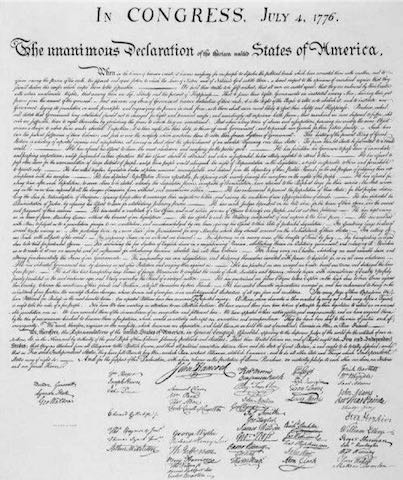

通过 `image_url` 提供将被识别的图片。

In [ ]:
image_url = "https://github.com/HaoHoo/F02AI/raw/master/N02/images/Vision/dlxy.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

服务终结点可以按照如下代码进行构造：

In [ ]:
text_recognition_url = vision_base_url + "recognizeText"
print(text_recognition_url)

手写文本识别服务可用于识别图像中的文本。在 `params` dictionary 参数中，除了我们尝试的手写文字，您能够设置类型 `mode` 为 `Printed` 来识别打印的文字。

In [ ]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'mode' : 'Handwritten'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

需要注意的是，文本识别服务不会自行、立刻返回已识别的文本。相反，它会在响应头中立即返回一个 `operation_url` 的 URL，必须对其进行轮询才能获得操作结果。

In [ ]:
operation_url = response.headers["Operation-Location"]

获取 `operation_url` 后，可以查询分析文本。以下代码行实现一个轮询循环，以等待操作完成。注意，轮询是通过 HTTP的 `get` 方法而不是 `post` 来完成的。

In [ ]:
import time
analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)
print(analysis)

接下来，可以提取识别的文本以及边界框，如下面的代码行所示。需要注意的一点是，手写文本识别API将边界框返回为**多边形**，而不是**矩形**。每个多边形由其顶点定义，使用以下约定：

<i>p</i> = [<i>x</i><sub>1</sub>, <i>y</i><sub>1</sub>, <i>x</i><sub>2</sub>, <i>y</i><sub>2</sub>, ..., <i>x</i><sub>N</sub>, <i>y</i><sub>N</sub>]

In [ ]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

最后，利用提取的多边形信息将识别出的文本覆盖在原始图像的顶部。请注意，`matplotlib` 库要求将顶点指定为表单的元组列表：

<i>p</i> = [(<i>x</i><sub>1</sub>, <i>y</i><sub>1</sub>), (<i>x</i><sub>2</sub>, <i>y</i><sub>2</sub>), ..., (<i>x</i><sub>N</sub>, <i>y</i><sub>N</sub>)]

处理代码将返回的多边形数据转换为 `matplotlib` 所需的格式，并在原始图片上标记识别的文字范围和识别结果。

In [ ]:
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='g')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="bottom", color='b')
_ = plt.axis("off")

## 分析保存在本地的图片 <a name="AnalyzeImageOnDisk"> </a>

Computer Vision REST API 不仅接受公共可访问图像的 URL，还可作为 HTTP 主体的一部分来提供要分析的图像。有关此功能的模式详细信息，请参阅[文档](https://westcentralus.dev.cognitive.microsoft.com/docs/services/5adf991815e1060e6355ad44/operations/56f91f2e778daf14a499e1fa). 

本节中的代码使用此功能分析磁盘上的示例图像。传递图像 URL 与传递图像数据的主要区别在于，请求的头必须包含表单的条目：
```py
{"Content-Type": "application/octet-stream"}
```
二进制图像数据必须通过 `data` 参数传递给 `requests.post`，而不是 `json` 参数。

首先，以下代码会从微软 [Computer Vision API](https://azure.microsoft.com/services/cognitive-services/computer-vision/) 示范网页下载一张图片，下载到本地（即本 notebook 运行的环境）的图片将会使用变量 `image_path` 来提供访问路径。

In [ ]:
%%bash
mkdir -p images
curl -Ls https://aka.ms/csnb-house-yard -o images/house_yard.jpg

这些代码使用 `bash` 来执行获取 https://aka.ms/csnb-house-yard 这个短链接所代表的图片链接，然后保存在创建的 images 目录中。当然，您也可以将其换成自己的图片的链接地址。

In [ ]:
image_path = "images/house_yard.jpg"

然后，我们把这张图片读取到一个字节队列（byte array）中，并发送到计算机视觉服务进行分析，并输出分析的结果。

In [ ]:
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream" }
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(vision_analyze_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()

analysis      = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

和前文一样，利用代码，标题可以很容易地覆盖在图像上。请注意，由于图像已经在本地可用，因此该过程比之前略短。

In [ ]:
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)

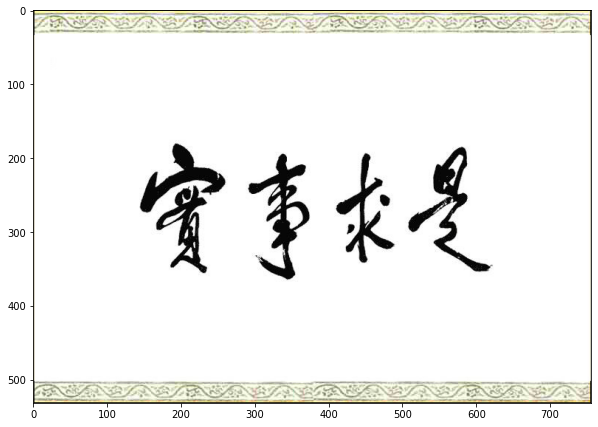

In [9]:
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
#image_url = "http://hanhvac.com/wp-content/uploads/2018/05/hello-world-cn-800x400.png"
image_url = "http://photo.chinamil.com.cn/tsjs/attachement/jpg/site3/20170220/64006a8dc5831a14abea1d.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
plt.figure(figsize=(10,10))
plt.imshow(image)

https://{endpoint}/vision/v3.1-preview.1/read/analyze[?language]

In [10]:
preview_base_url = "https://"+service_region+".api.cognitive.microsoft.com/vision/v3.1-preview.1/read/analyze/"
#preview_base_url = "https://"+service_region+".api.cognitive.microsoft.com/vision/v3.0/read/analyze/"
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/json" }
params   = {'anguage' : 'zh-Hans'}
data     = {'url': image_url}
response = requests.post(preview_base_url, headers=headers, params=params, json=data)
response.raise_for_status()
operation_url = response.headers["Operation-Location"]
print(operation_url)

https://westus.api.cognitive.microsoft.com/vision/v3.1-preview.1/read/analyzeResults/257eaf94-f987-4a0c-a5f4-e07c74fd8ec8


In [11]:
import time
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
analysis = {}
while not "analyzeResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis       = response_final.json()
    time.sleep(1)
print(analysis)

{'status': 'succeeded', 'createdDateTime': '2020-08-17T03:41:32Z', 'lastUpdatedDateTime': '2020-08-17T03:41:32Z', 'analyzeResult': {'version': '3.1.0', 'readResults': [{'page': 1, 'angle': 1.4762, 'width': 756, 'height': 532, 'unit': 'pixel', 'lines': [{'boundingBox': [284, 185, 479, 193, 478, 328, 288, 326], 'text': '事北', 'words': [{'boundingBox': [321, 186, 415, 188, 411, 328, 318, 326], 'text': '事', 'confidence': 0.951}, {'boundingBox': [443, 189, 480, 190, 476, 329, 439, 329], 'text': '北', 'confidence': 0.448}]}]}]}}
